# ExPose Tutorial

Generate your own 3D human body shapes from monocular RGB images!

ExPose is a model developed by Choutas et al.
You may get more details here: https://expose.is.tue.mpg.de/

Clone ExPose files from Github

In [1]:
%cd /content
!rm -rf /content/expose
!git clone https://github.com/vchoutas/expose
%cd expose

/content
Cloning into 'expose'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 138 (delta 25), reused 19 (delta 19), pack-reused 100
Receiving objects: 100% (138/138), 6.70 MiB | 17.38 MiB/s, done.
Resolving deltas: 100% (55/55), done.
/content/expose


Install library packages

In [2]:
import os
import shutil
from google.colab import drive
drive.mount('/content/gdrive')
req_file = "requirementsv3.txt"
gdrive_path = "/content/gdrive/MyDrive/files"
dst_path = "/content/expose"
shutil.copyfile(os.path.join(gdrive_path, req_file), os.path.join(dst_path, req_file))

!pip install -r requirementsv3.txt

Mounted at /content/gdrive
     |████████████████████████████████| 50 kB 4.4 MB/s 
     |████████████████████████████████| 58 kB 6.7 MB/s 
     |████████████████████████████████| 11.2 MB 47.8 MB/s 
     |████████████████████████████████| 4.6 MB 50.7 MB/s 
     |████████████████████████████████| 3.1 MB 55.1 MB/s 
     |████████████████████████████████| 1.2 MB 58.9 MB/s 
     |████████████████████████████████| 646 kB 61.1 MB/s 
     |████████████████████████████████| 596 kB 72.8 MB/s 
     |████████████████████████████████| 930 kB 63.7 MB/s 
     |████████████████████████████████| 2.2 MB 47.1 MB/s 
     |████████████████████████████████| 978 kB 54.8 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=1b6b12848960c35d5afd67ec2e68c01c25371f39370bbc95defa5eb0211a78cf
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a0dd63f4c13678b2a5ec488e48078756505c7777b75b29e
  Created wheel for PyOpenGL: filename=PyOpenGL-3.1.0-py3-none-any.w

Import model files for ExPose

Download the zip files and place in MyDrive/files

In [3]:
%cd /content/

EXPOSE_PATH = '/content/gdrive/MyDrive/files/expose_data.zip'

DATA_PATH = '/content/expose'

!unzip -n '$EXPOSE_PATH' -d  $DATA_PATH

/content
Archive:  /content/gdrive/MyDrive/files/expose_data.zip
  inflating: /content/expose/data/all_means.pkl  
   creating: /content/expose/data/checkpoints/
  inflating: /content/expose/data/checkpoints/model.ckpt  
 extracting: /content/expose/data/checkpoints/latest_checkpoint  
  inflating: /content/expose/data/conf.yaml  
  inflating: /content/expose/data/shape_mean.npy  
  inflating: /content/expose/data/SMPLX_to_J14.pkl  


In [4]:
SMPLX_ZIP_PATH = '/content/gdrive/MyDrive/files/models_smplx_v1_1.zip'

SMPLX_MODEL_PATH = '/content/expose/data'

!unzip -n '$SMPLX_ZIP_PATH' -d  $SMPLX_MODEL_PATH

Archive:  /content/gdrive/MyDrive/files/models_smplx_v1_1.zip
   creating: /content/expose/data/models/
   creating: /content/expose/data/models/smplx/
  inflating: /content/expose/data/models/smplx/SMPLX_NEUTRAL.npz  
 extracting: /content/expose/data/models/smplx/version.txt  
  inflating: /content/expose/data/models/smplx/SMPLX_MALE.pkl  
  inflating: /content/expose/data/models/smplx/SMPLX_FEMALE.npz  
 extracting: /content/expose/data/models/smplx/smplx_npz.zip  
  inflating: /content/expose/data/models/smplx/SMPLX_MALE.npz  
  inflating: /content/expose/data/models/smplx/SMPLX_FEMALE.pkl  
  inflating: /content/expose/data/models/smplx/SMPLX_NEUTRAL.pkl  


Run ExPose and generate 3D human body shapes

*Remember to enable GPU for colab*

In [5]:
!rm -rf /content/expose/data/expose_results
%cd /content/expose

!python demo.py --image-folder samples \
    --exp-cfg data/conf.yaml \
    --show=False \
    --output-folder /content/expose/data/expose_results \
    --save-params=False \
    --save-vis=True \
    --save-mesh=True \
    --degrees 0 90 180

/content/expose
Downloading: "https://download.pytorch.org/models/keypointrcnn_resnet50_fpn_coco-fc266e95.pth" to /root/.cache/torch/hub/checkpoints/keypointrcnn_resnet50_fpn_coco-fc266e95.pth
100% 226M/226M [00:01<00:00, 120MB/s]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Processing with R-CNN: 100% 1/1 [00:02<00:00,  2.50s/it]
2022-05-22 14:57:40.407 | INFO     | __main__:main:241 - Saving results to: /content/expose/data/expose_results
2022-05-22 14:57:40.412 | WARNING  | expose.models.attention.predictor:__init__:92 - Apply hand network on body: True
2022-05-22 14:57:40.412 | 

Lets view the results:

In [6]:
!pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 7.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


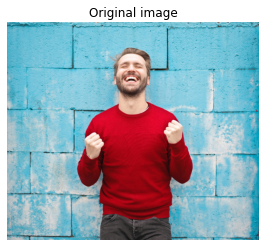

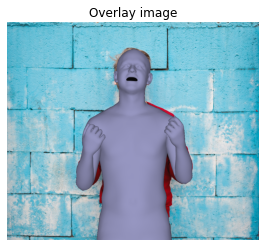

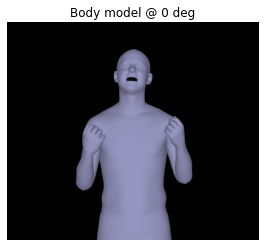

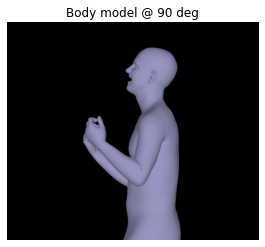

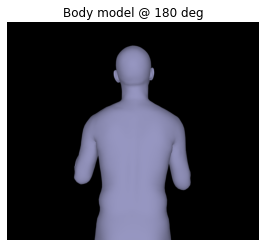

In [7]:
import cv2
import matplotlib.pyplot as plt


original_image = cv2.imread('/content/expose/data/expose_results/man-in-red-crew-neck-sweatshirt-photography-941693.png_000/hd_imgs.png')
plt.axis('off')
plt.title("Original image")
plt.imshow(cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB))
plt.show()

overlay_image = cv2.imread('/content/expose/data/expose_results/man-in-red-crew-neck-sweatshirt-photography-941693.png_000/hd_overlay.png')
plt.axis('off')
plt.title("Overlay image")
plt.imshow(cv2.cvtColor(overlay_image,cv2.COLOR_BGR2RGB))
plt.show()

body_model_000 = cv2.imread('/content/expose/data/expose_results/man-in-red-crew-neck-sweatshirt-photography-941693.png_000/hd_rendering_000.png')
plt.axis('off')
plt.title("Body model @ 0 deg")
plt.imshow(cv2.cvtColor(body_model_000,cv2.COLOR_BGR2RGB))
plt.show()

body_model_090 = cv2.imread('/content/expose/data/expose_results/man-in-red-crew-neck-sweatshirt-photography-941693.png_000/hd_rendering_090.png')
plt.axis('off')
plt.title("Body model @ 90 deg")
plt.imshow(cv2.cvtColor(body_model_090,cv2.COLOR_BGR2RGB))
plt.show()

body_model_180 = cv2.imread('/content/expose/data/expose_results/man-in-red-crew-neck-sweatshirt-photography-941693.png_000/hd_rendering_180.png')
plt.axis('off')
plt.title("Body model @ 180 deg")
plt.imshow(cv2.cvtColor(body_model_180,cv2.COLOR_BGR2RGB))
plt.show()

